<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Burnins" data-toc-modified-id="Burnins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Burnins</a></span></li><li><span><a href="#MTAT" data-toc-modified-id="MTAT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MTAT</a></span></li></ul></div>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Burnins

In [7]:
df1 = pd.read_csv("../output/endpoints_a9fbc42e-7368-ea11-a2c5-c4346bcb1550.csv")
df2 = pd.read_csv("../output/endpoints_374cd6bf-5c6a-ea11-a2c5-c4346bcb1550.csv")


Text(0.5, 0, 'larval habs')

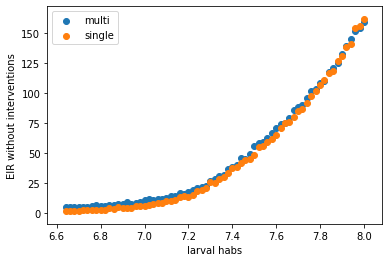

In [56]:
foo = df1.groupby("funest").agg("mean").reset_index()
plt.scatter(foo["funest"], foo["EIR"], label="multi")

foo = df2.groupby("funest").agg("mean").reset_index()
plt.scatter(foo["funest"], foo["EIR"]*30, label="single")

plt.legend()
plt.ylabel("EIR without interventions")
plt.xlabel("larval habs")

## MTAT

In [44]:
df_single = pd.read_csv("../output/endpoints_ef2059d5-f46b-ea11-a2c5-c4346bcb1550.csv")
df_multi = pd.read_csv("../output/endpoints_43bb7941-2369-ea11-a2c5-c4346bcb1550.csv")

In [45]:
df_single = df_single[df_single["year"]==3]


In [31]:
df_multi["intervention_package"] = ""
for hs in [60,80,100]:
    for rcd_on in [False, True]:
        if rcd_on:
            intervention_package_name = "HS{}_MTAT".format(hs)
        else:
            intervention_package_name = "HS{}_only".format(hs)

        cut = np.logical_and(df_multi["u5_hs_rate"]==hs/100, df_multi["rcd_on"]==rcd_on)
        df_multi.loc[cut, "intervention_package"] = intervention_package_name

In [33]:
df_multi = df_multi[np.logical_and(df_multi["year"]==3, df_multi["intervention_package"]=="HS60_MTAT")]

Text(0, 0.5, 'avg_RDT_prev')

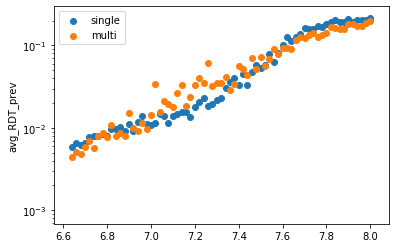

In [55]:
foo = df_single.groupby("funest").agg("mean").reset_index()
plt.scatter(foo["funest"],foo["avg_RDT_prev"],label="single")

foo = df_multi.groupby("funest").agg("mean").reset_index()
plt.scatter(foo["funest"],foo["avg_RDT_prev"],label="multi")

plt.legend()
# plt.xscale("log")
plt.yscale("log")
plt.ylabel("avg_RDT_prev")